<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Math for 8th grade

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [3]:
#len(data['YEAR'].unique()), should I use this one or the other one whats the difference
df['YEAR'].unique().shape[0]

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [4]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
OHIO_AV = df[df['STATE'] == 'OHIO']['AVG_MATH_8_SCORE'].mean()
MICH_AV = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_8_SCORE'].mean()
print(f'Ohio Mean is {OHIO_AV}')
print(f'Michigan mean is {MICH_AV}')
print('Ohio is higher, regrettably')

Ohio Mean is 282.25
Michigan mean is 276.1666666666667
Ohio is higher, regrettably


Find the average for your outcome score across all states in 2019

In [5]:
df[df['YEAR'] == 2019]['AVG_MATH_8_SCORE'].mean()

281.2641509433962

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [6]:
df.groupby('STATE').max('AVG_MATH_8_SCORE')['AVG_MATH_8_SCORE']

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [7]:
print(df.columns)
#Try to fill in missing enrollment data
((df.ENROLL - df.GRADES_ALL_G)/ df.GRADES_ALL_G * 100).describe() 
#lol why is there some state where the enroll is extremely different from grades_all_g

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


count    397.000000
mean      -2.594598
std        5.130113
min      -45.069266
25%       -3.139245
50%       -1.352326
75%       -0.398791
max        9.640412
dtype: float64

In [8]:
#Is there a difference between total expenditure and the sum of expenditure categories?
((df.TOTAL_EXPENDITURE - df.INSTRUCTION_EXPENDITURE  - df.SUPPORT_SERVICES_EXPENDITURE - df.CAPITAL_OUTLAY_EXPENDITURE - df.OTHER_EXPENDITURE)/ df.TOTAL_EXPENDITURE * 100).describe() 

count    397.000000
mean       4.105301
std        3.208903
min        0.000000
25%        2.348848
50%        3.462014
75%        5.183788
max       25.096272
dtype: float64

In [9]:
df['ENROLL'] = df['ENROLL'].fillna(df.GRADES_ALL_G)
df['TOTAL_EXPENDITURE'] = df['TOTAL_EXPENDITURE'].fillna(df.INSTRUCTION_EXPENDITURE + df.SUPPORT_SERVICES_EXPENDITURE + df.CAPITAL_OUTLAY_EXPENDITURE + df.OTHER_EXPENDITURE)
#EXPENDITURE / ENROLLMENT
df['STUDENT_COST'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']
df[~np.isnan(df['STUDENT_COST'])].groupby('STATE').mean('STUDENT_COST')['STUDENT_COST']
#it looks like the data has expenditure listed by thousands
#also for some reason there are weird non state names like 'NATIONAL' and 'DODEA' in the data set

STATE
ALABAMA                  8.467198
ALASKA                  17.136268
ARIZONA                  7.866970
ARKANSAS                 8.936896
CALIFORNIA              10.187042
COLORADO                 9.522948
CONNECTICUT             14.955648
DELAWARE                13.611544
DISTRICT_OF_COLUMBIA    20.196294
FLORIDA                  9.315343
GEORGIA                  9.355067
HAWAII                  10.637982
IDAHO                    6.795344
ILLINOIS                12.256986
INDIANA                 10.008738
IOWA                    10.685008
KANSAS                  10.280909
KENTUCKY                 8.784592
LOUISIANA                9.519894
MAINE                   11.861853
MARYLAND                12.430973
MASSACHUSETTS           13.887163
MICHIGAN                11.382783
MINNESOTA               11.730289
MISSISSIPPI              7.556562
MISSOURI                 9.487659
MONTANA                 10.105516
NEBRASKA                10.401776
NEVADA                   9.260828
NEW_HAMP

Final feature list: AVG_MATH_4_SCORE, AVG_READING_8_SCORE, TOTAL_EXPENDITURE/ENROLL (STUDENT_COST), YEAR

Feature selection justification: AVG_MATH_4_SCORE: Performance in math in general is expected be a powerful indicator of performance in 8th-grade math.  
AVG_READING_8_SCORE: Academic performance in other disciplines could be correlated with general academic performance possibly due to environmental and instutional factors at a given school in a given year.  
TOTAL_EXPENDITURE/ENROLL (STUDENT_COST): The amount of money spent per student might correlate with quality or quantity of learning and other services offered to students  
YEAR: It is possible that events which happen in a certain year can affect educational outcomes. Perhaps educational trends are trending upward or downward over time. Certainly, events localized to a specific year can affect educational outcomes, like a pandemic, but the linear regression model might not capture this.


<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

<AxesSubplot:xlabel='AVG_MATH_4_SCORE', ylabel='AVG_MATH_8_SCORE'>

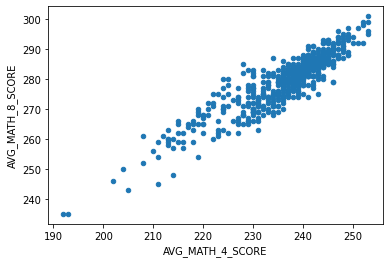

In [10]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE')

Plot of average math score of 8th graders against average math score of 4th graders. It appears that states which did well in 4th grade also tended to do will in 8th grade with very strong correlation.

**Visualization 2**

<AxesSubplot:xlabel='STUDENT_COST', ylabel='AVG_MATH_8_SCORE'>

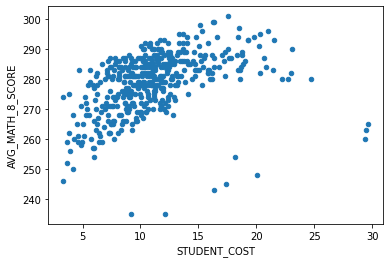

In [11]:
df.plot.scatter(x='STUDENT_COST', y='AVG_MATH_8_SCORE')

Plot of average math score of 8th graders against expenditure per student. It seems that spending more on students does tend to yield better math scores in 8th grade, but this is not as absolute as the 4th grade math correlation. It seems that additional cost sometimes is related to factors which don't contribute to better outcomes.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[['AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE', 'STUDENT_COST', 'YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: REGRESSION

In [15]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [16]:
# create your model here
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
print(model.intercept_)
print(model.coef_)
y_pred = model.predict(X_test)

44.80281448242957
[ 0.75226051  0.53225593  0.02814671 -0.04193855]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Average 8th Grade Math Score')

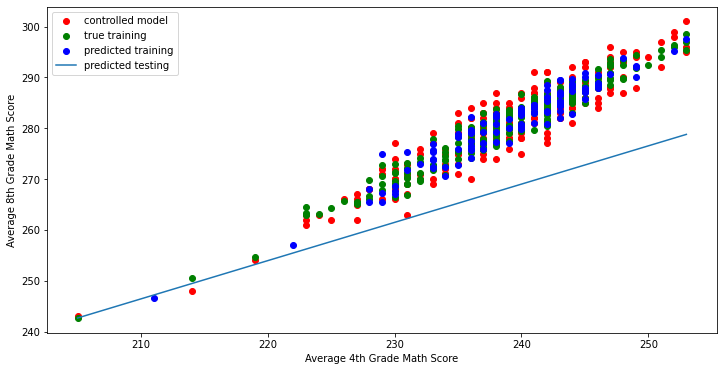

In [19]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'AVG_MATH_4_SCORE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel('Average 4th Grade Math Score')
plt.ylabel('Average 8th Grade Math Score')

<h2> Summary </h2>

In [20]:
model.score(X_test, y_test)

0.8830420714690038

The model apparently explains the variance in the data relatively well. Looking at each feature of the model data, it seems that the 4th grade math score average and 8th grade reading score average both correlate with 8th grade math scores very well. The other two features considered, year and expenditure per student, do not correlate very much. That year does not correlate much with 8th grade math performance is not too surprising; it simply means we fail to find general trends over time with respect to this measure. That expenditure per student does not correlate, however, is a little more suprising. From the graph of 8th grade math performance against this measure, it seems that most points do show some correlation, however there is a small set out outliers to the trend. I suspect that there are a few states where costs are high due to some other factor. For example, perhaps busing in Alaska, with its weather, is significantly more expensive than in warmer states. This is a question which might prompt further research. I could do something quick and dirty right now though.

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,STUDENT_COST
569,2003_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2003,67522.0,1114061.0,152599.0,0.0,961462.0,1105963.0,473414.0,...,5158.0,2971.0,45706.0,16828.0,78057.0,205.0,243.0,188.0,239.0,16.379299
671,2005_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2005,62306.0,1109605.0,167922.0,0.0,941683.0,1085658.0,459063.0,...,5196.0,3177.0,41142.0,18769.0,76876.0,211.0,245.0,191.0,238.0,17.424614
773,2007_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2007,56943.0,1148358.0,134700.0,0.0,1013658.0,1140506.0,491992.0,...,5182.0,4002.0,40295.0,20242.0,78422.0,214.0,248.0,197.0,241.0,20.028906
810,2007_VERMONT,VERMONT,2007,89329.0,1836316.0,97086.0,1237083.0,502147.0,1804519.0,800453.0,...,7039.0,7714.0,52379.0,30942.0,94038.0,246.0,291.0,228.0,273.0,20.200819
875,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2009,44331.0,801008.0,75856.0,0.0,725152.0,805362.0,330698.0,...,4452.0,3301.0,37698.0,17597.0,69433.0,219.0,254.0,202.0,242.0,18.167016
899,2009_NEW_YORK,NEW_YORK,2009,2696688.0,55885116.0,3197833.0,25768345.0,26918938.0,57851481.0,35195372.0,...,198690.0,188377.0,1550122.0,858087.0,2766052.0,241.0,283.0,224.0,264.0,21.452790
977,2011_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2011,44199.0,1283071.0,155505.0,0.0,1127566.0,1297175.0,525185.0,...,4328.0,3190.0,38259.0,17261.0,73911.0,222.0,260.0,201.0,242.0,29.348515
1001,2011_NEW_YORK,NEW_YORK,2011,2677412.0,57753776.0,5118477.0,23188002.0,29447297.0,59446908.0,37834196.0,...,201190.0,190732.0,1595807.0,831712.0,2704718.0,238.0,280.0,222.0,266.0,22.203123
1014,2011_VERMONT,VERMONT,2011,86982.0,1686499.0,106823.0,1329172.0,250504.0,1722515.0,888388.0,...,6646.0,6930.0,50525.0,27762.0,89908.0,247.0,294.0,227.0,274.0,19.803120
1072,2013_ALASKA,ALASKA,2013,131091.0,2545117.0,320938.0,1707449.0,516730.0,2665933.0,1324649.0,...,9677.0,9500.0,78835.0,38230.0,130944.0,236.0,282.0,209.0,261.0,20.336507


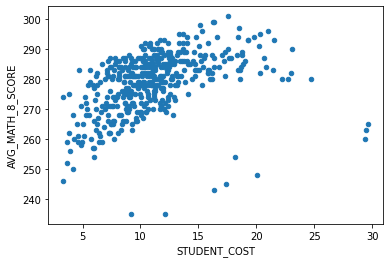

In [21]:
df.plot.scatter(x = 'STUDENT_COST', y = 'AVG_MATH_8_SCORE')
df[df['AVG_MATH_8_SCORE'] / df['STUDENT_COST'] < 15]

It looks like the culprits with high spending and relatively low results don't include Alaska as often as I had guessed. In addition to Alaska, Wyoming and Vermont, two other extremely rural states, appear on the list. DC, NJ, and NY are all extremely urban. So it seems that the states which get the least return on investment for 8th grade math are either extremely rural or extremely urban. Perhaps factors for this include the long distance of busing or low supply of teachers in rural states and high cost of living in urban states. Further research is needed.